# Climate Change Analysis

In [1]:
#import required libraries & Modules
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
print(df.dtypes)
print("Shape of data : ",df.shape)

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object
Shape of data :  (645675, 5)


In [4]:
#Find the missing value  
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

## fill misssing value with Rolling average

In [5]:

df['new_avg']= df.AverageTemperature.fillna(df.AverageTemperature.rolling(12,center=True,min_periods=1).mean())

In [6]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,new_avg
0,1855-05-01,25.544,1.171,Acre,Brazil,25.544
1,1855-06-01,24.228,1.103,Acre,Brazil,24.228
2,1855-07-01,24.371,1.044,Acre,Brazil,24.371
3,1855-08-01,25.427,1.073,Acre,Brazil,25.427
4,1855-09-01,25.675,1.014,Acre,Brazil,25.675


In [7]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
new_avg                          17795
dtype: int64

In [8]:
#Rename the columns
df.rename(columns={'dt':'Date','new_avg':'Avg_Temp'},inplace=True)

In [9]:
#No of Country and state
df['Country'].nunique() , df['State'].nunique()

(7, 241)

In [10]:
#make Date column  index
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=645675, freq=None)

In [11]:
df.index.min(),df.index.max()

(Timestamp('1743-11-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

# take data between 1900 to 2013 for analysis

In [12]:

latest_df=df.loc['1900':'2013']
latest_df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Avg_Temp
Date,,,,,
1900-01-01,25.732,1.080,Acre,Brazil,25.732
1900-02-01,26.050,1.080,Acre,Brazil,26.050
1900-03-01,26.574,0.894,Acre,Brazil,26.574
1900-04-01,25.947,1.192,Acre,Brazil,25.947
1900-05-01,25.557,0.856,Acre,Brazil,25.557


In [13]:
latest_df.isnull().sum()

AverageTemperature               181
AverageTemperatureUncertainty    181
State                              0
Country                            0
Avg_Temp                           0
dtype: int64

In [14]:
latest_df.shape

(328965, 5)

In [15]:
latest_df['Avg_Temp'].describe()

count    328965.000000
mean          9.769515
std          13.928462
min         -45.389000
25%           0.407000
50%          12.196000
75%          20.915000
max          36.339000
Name: Avg_Temp, dtype: float64

In [16]:
#Resample
resample_df=latest_df[['Avg_Temp']].resample('A').mean()
resample_df.head()

,Avg_Temp
Date,
1900-12-31,9.413617
1901-12-31,9.538776
1902-12-31,9.076432
1903-12-31,9.414545
1904-12-31,9.039092


In [17]:
resample_df.index.min(),resample_df.index.max()


(Timestamp('1900-12-31 00:00:00', freq='A-DEC'),
 Timestamp('2013-12-31 00:00:00', freq='A-DEC'))

In [18]:
resample_df.shape

(114, 1)

In [19]:
resample_df.describe()

,Avg_Temp
count,114.000000
mean,9.774065
std,0.522439
min,8.827680
25%,9.413849
50%,9.695117
75%,10.003594
max,11.844211


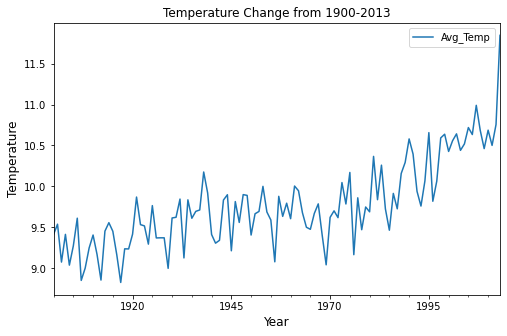

In [20]:
#Plot 
resample_df.plot(title='Temperature Change from 1900-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

## Check for statinarity of time series using DICKEY FULLER TEST

In [21]:
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Result: ')
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Result: 
Test Statistic                   1.503401
p-value                          0.997537
Lags Used                        8.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


p-value > 0.05 accept null hypothesis (non-stationary)

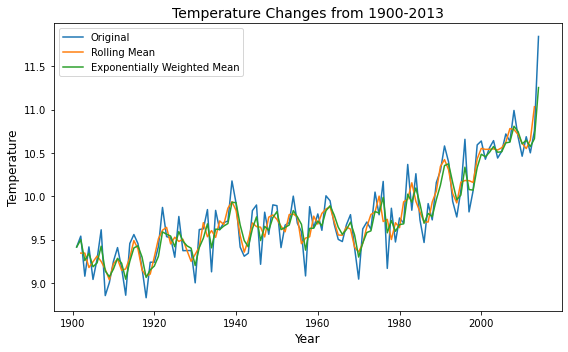

In [22]:
#Rolling mean
rol_mean = resample_df.rolling(window=3,center=True).mean()
#Exponentially Weighted Mean
ewm = resample_df.ewm(span=3).mean()

fig,(ax1) = plt.subplots(1,figsize = (8,5))

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm,label='Exponentially Weighted Mean')

ax1.set_title('Temperature Changes from 1900-2013', fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

plt.tight_layout()
plt.show()

## Make Time series Stationary

## Calculate Rolling mean, Exponentially Weighted Mean

In [23]:
diff_rol_mean= resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_Temp
Date,
1901-12-31,0.195835
1902-12-31,-0.266819
1903-12-31,0.237856
1904-12-31,-0.203583
1905-12-31,-0.034174


In [24]:
diff_ewm = resample_df -ewm
diff_ewm.dropna(inplace = True)
diff_ewm.head()

,Avg_Temp
Date,
1900-12-31,0.000000
1901-12-31,0.041720
1902-12-31,-0.180268
1903-12-31,0.073661
1904-12-31,-0.146029


## New Time Series after substracting Rolling_mean and EWM

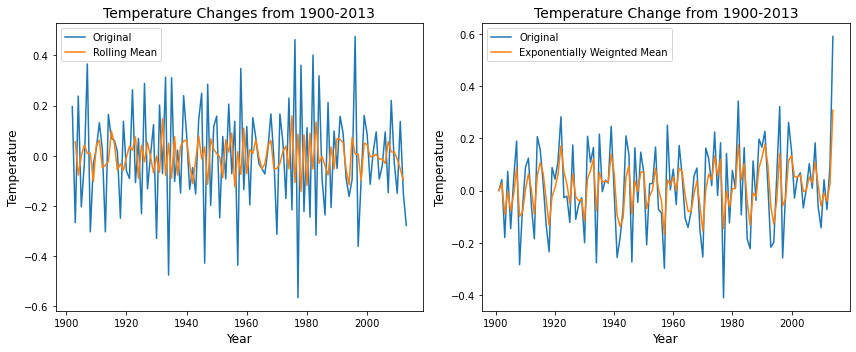

In [25]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3,center=True).mean()

df_ewm_diff = diff_ewm.ewm(span=3).mean()

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))

ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')

ax1.set_title('Temperature Changes from 1900-2013', fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()


ax2.plot(diff_ewm,label= 'Original')
ax2.plot(df_ewm_diff,label='Exponentially Weignted Mean')
ax2.set_title('Temperature Change from 1900-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()


In [26]:
# Check for stationarity for new time series
print('Dickey-Fuller Test for the Rolling Mean:')
df_test=adfuller(diff_rol_mean.iloc[:,0].values, autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)
print('Dickey-Fuller Test for the Exponentially Weignted Mean: ' )
df_test=adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                -6.277119e+00
p-value                        3.876154e-08
Lags Used                      1.100000e+01
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64
Dickey-Fuller Test for the Exponentially Weignted Mean: 
Test Statistic                -6.570111e+00
p-value                        7.975378e-09
Lags Used                      5.000000e+00
Number of Observations Used    1.080000e+02
Critical Value (1%)           -3.492401e+00
Critical Value (5%)           -2.888697e+00
Critical Value (10%)          -2.581255e+00
dtype: float64


p-value <0.05 reject the null hypothesis and accept alternet hypothesis(Stationary)

# Climate change forcasting

# ARIMA

In [27]:
resample_df.head()

,Avg_Temp
Date,
1900-12-31,9.413617
1901-12-31,9.538776
1902-12-31,9.076432
1903-12-31,9.414545
1904-12-31,9.039092


In [28]:
resample_df.shape

(114, 1)

In [29]:
#AUTO ARIMA
!pip install pmdarima

In [30]:
y=resample_df.Avg_Temp.values

In [31]:
y.shape

(114,)

In [32]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [33]:
train, test = train_test_split(resample_df, train_size=int(0.9 * resample_df.shape[0]))

In [34]:
train.shape,test.shape

((102, 1), (12, 1))

In [140]:
train.head()

,Avg_Temp
Date,
1900-12-31,9.413617
1901-12-31,9.538776
1902-12-31,9.076432
1903-12-31,9.414545
1904-12-31,9.039092


In [125]:
type(test)

pandas.core.frame.DataFrame

In [129]:
test.index

DatetimeIndex(['2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

In [35]:
# Fit your model
model = pm.auto_arima( train, start_p=5, max_p=10, seasonal=True, trace = True) #seasonal =False
# random search
# make your forecasts
forecasts = model.predict(test.shape[0])

Performing stepwise search to minimize aic
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=55.539, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=95.647, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=74.815, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=48.781, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=93.737, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=50.021, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=50.060, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=52.781, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=51.709, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.212 seconds


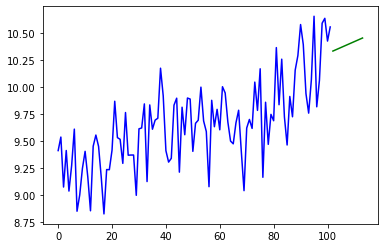

In [36]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(resample_df.shape[0])
plt.plot(x[:102], train, c='blue')
plt.plot(x[102:], forecasts, c='green')
plt.show()

In [37]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [38]:
train_size = int(0.9 * resample_df.shape[0])
test_size = resample_df.shape[0] - train_size

In [132]:
train_size

102

In [134]:
test_size

12

In [135]:
print(test_size)

12


In [139]:
model_arima = ARIMA(train, order=(0,1,1))#order is p,d,q #0,1,1
model_fit = model_arima.fit()
output = model_fit.forecast(test_size)
output

2002-12-31    10.351731
2003-12-31    10.351731
2004-12-31    10.351731
2005-12-31    10.351731
2006-12-31    10.351731
2007-12-31    10.351731
2008-12-31    10.351731
2009-12-31    10.351731
2010-12-31    10.351731
2011-12-31    10.351731
2012-12-31    10.351731
2013-12-31    10.351731
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [97]:
output[0]

10.351730955807485

In [98]:
mean_squared_error(test,output)

0.28243537593585105

In [99]:
mean_squared_error(test,output)**0.5

0.5314464939538609

In [100]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test,output)

0.035099755777920544

In [104]:
# save model
model_fit.save('climate_arima.pkl')


In [ ]:
# load model
#loaded = ARIMAResults.load('climate_arima.pkl')

#  Apply regression on TS using lag values

In [44]:
reg_data=resample_df.copy()

In [45]:
reg_data.head()

,Avg_Temp
Date,
1900-12-31,9.413617
1901-12-31,9.538776
1902-12-31,9.076432
1903-12-31,9.414545
1904-12-31,9.039092


In [46]:
reg_data.shape

(114, 1)

In [47]:
reg_data.columns

Index(['Avg_Temp'], dtype='object')

In [48]:
reg_data['lag1']=reg_data['Avg_Temp'].shift(1)
reg_data['lag2']=reg_data['Avg_Temp'].shift(2)
reg_data['lag3']=reg_data['Avg_Temp'].shift(3)
reg_data['lag4']=reg_data['Avg_Temp'].shift(4)
reg_data['lag5']=reg_data['Avg_Temp'].shift(5)

In [49]:
reg_data.head(10)

,Avg_Temp,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1900-12-31,9.413617,NaN,NaN,NaN,NaN,NaN
1901-12-31,9.538776,9.413617,NaN,NaN,NaN,NaN
1902-12-31,9.076432,9.538776,9.413617,NaN,NaN,NaN
1903-12-31,9.414545,9.076432,9.538776,9.413617,NaN,NaN
1904-12-31,9.039092,9.414545,9.076432,9.538776,9.413617,NaN
1905-12-31,9.274387,9.039092,9.414545,9.076432,9.538776,9.413617
1906-12-31,9.612203,9.274387,9.039092,9.414545,9.076432,9.538776
1907-12-31,8.852557,9.612203,9.274387,9.039092,9.414545,9.076432
1908-12-31,9.002791,8.852557,9.612203,9.274387,9.039092,9.414545


In [50]:
df_r=reg_data.loc['1905-12-31':,:]

In [51]:
df_r.shape

(109, 6)

In [52]:
df_r.columns

Index(['Avg_Temp', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5'], dtype='object')

In [53]:
df_r.head()

,Avg_Temp,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1905-12-31,9.274387,9.039092,9.414545,9.076432,9.538776,9.413617
1906-12-31,9.612203,9.274387,9.039092,9.414545,9.076432,9.538776
1907-12-31,8.852557,9.612203,9.274387,9.039092,9.414545,9.076432
1908-12-31,9.002791,8.852557,9.612203,9.274387,9.039092,9.414545
1909-12-31,9.248219,9.002791,8.852557,9.612203,9.274387,9.039092


#  X & Y split 

In [54]:
X = df_r.drop(['Avg_Temp'],axis=1)
Y = df_r['Avg_Temp']

In [55]:
X.shape, Y.shape

((109, 5), (109,))

In [56]:
size = int(len(X) * 0.9)
X_train, X_test = X[0:size], X[size:len(X)]
Y_train, Y_test = Y[0:size], Y[size:len(X)]

In [57]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((98, 5), (11, 5), (98,), (11,))

#  Apply regression algorithm

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 7)

In [59]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(random_state=7)

In [60]:
Y_pred_rfr = rfr.predict(X_test)

In [61]:
mean_squared_error(Y_test,Y_pred_rfr)

0.28738916032112555

In [62]:
mean_squared_error(Y_test,Y_pred_rfr)**0.5

0.5360868962408292

# RNN/LSTM_Time_series

In [63]:
resample_df.head()

,Avg_Temp
Date,
1900-12-31,9.413617
1901-12-31,9.538776
1902-12-31,9.076432
1903-12-31,9.414545
1904-12-31,9.039092


<AxesSubplot:xlabel='Date'>

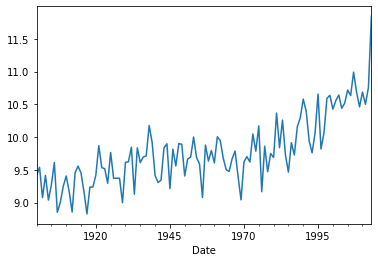

In [64]:
resample_df['Avg_Temp'].plot()

In [65]:
rnn_data=resample_df[['Avg_Temp']].copy()

In [66]:
rnn_data.shape

(114, 1)

In [67]:
rnn_data.head()

,Avg_Temp
Date,
1900-12-31,9.413617
1901-12-31,9.538776
1902-12-31,9.076432
1903-12-31,9.414545
1904-12-31,9.039092


In [68]:
dataset_train = rnn_data.iloc[:90,:]
dataset_train.shape

(90, 1)

In [69]:
# Convert data frame / series to numpy array
training_set = dataset_train.iloc[:, 0].values
training_set[:5]

array([9.41361653, 9.53877628, 9.07643188, 9.4145453 , 9.03909163])

In [70]:
training_set.shape

(90,)

# Add extra dimemsion to the data for processing in RNN / LSTM neuron

In [71]:
# Add extra dim for processing purpose
training_set = training_set.reshape(-1,1)

In [72]:
training_set[:5]

array([[9.41361653],
       [9.53877628],
       [9.07643188],
       [9.4145453 ],
       [9.03909163]])

In [73]:
training_set.shape

(90, 1)

<AxesSubplot:>

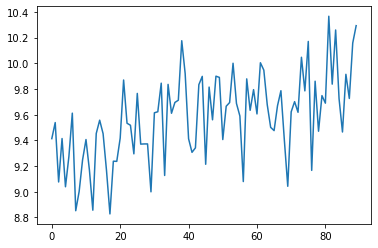

In [74]:
pd.Series(training_set.flat).plot()

In [77]:
#Transform time series for having lag values and output variable

In [78]:
timesteps=5 # How many lag Values to train the data
trn_size = dataset_train.shape[0]

In [105]:
# add lag values to train dataset
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set[i-timesteps:i, 0])
    y_train.append(training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [106]:
X_train.shape

(85, 5)

In [107]:
y_train.shape

(85,)

In [82]:
X_train[:1]

array([[2.24215721, 2.2553652 , 2.20568115, 2.24225587, 2.20155869]])

In [83]:
y_train[:1]

array([2.22725647])

In [84]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,2.242157,2.255365,2.205681,2.242256,2.201559
1,2.255365,2.205681,2.242256,2.201559,2.227256
2,2.205681,2.242256,2.201559,2.227256,2.263033
3,2.242256,2.201559,2.227256,2.263033,2.180706
4,2.201559,2.227256,2.263033,2.180706,2.197535


## Reshape X_train to add extra dimension

In [85]:
#It is added to be processed easily by RNN / LSTM
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [86]:
X_train.shape

(85, 5, 1)

In [87]:
X_train[:1]

array([[[2.24215721],
        [2.2553652 ],
        [2.20568115],
        [2.24225587],
        [2.20155869]]])

## Building the RNN / LSTM

In [88]:
import tensorflow as tf
from tensorflow import keras

In [89]:
type(X_train)

numpy.ndarray

In [90]:
(X_train.shape[1],X_train.shape[2])

(5, 1)

In [91]:
#create the model

model = keras.Sequential()

# Adding LSTM layers
# inputlayer()
model.add(keras.layers.LSTM(units=10,#return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))
# model.add(keras.layers.LSTM(units=70,return_sequences = True ))
# model.add(keras.layers.LSTM(units=25 ))

# Adding the output layer
model.add(keras.layers.Dense(1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Fitting the RNN to the Training set

In [93]:
history = model.fit( X_train, y_train, validation_split=0.3,epochs = 50, batch_size = 5)

Epoch 1/50
12/12 [==============================] - 3s 53ms/step - loss: 3.7051 - val_loss: 3.4454
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 3.0755 - val_loss: 2.7947
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 2.4307 - val_loss: 2.1323
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 1.7846 - val_loss: 1.4899
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 1.1850 - val_loss: 0.9241
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6891 - val_loss: 0.4969
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 0.3425 - val_loss: 0.2272
Epoch 8/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1416 - val_loss: 0.0867
Epoch 9/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0472 - val_loss: 0.0271
Epoch 10/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0119 - val_loss: 0.0073
Epoch 11/50
12/12 

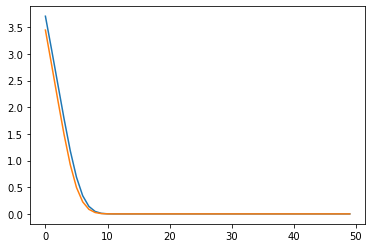

In [94]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [103]:
model.save("Climate_Change_Analysis")

INFO:tensorflow:Assets written to: Climate_Change_Analysis\assets


INFO:tensorflow:Assets written to: Climate_Change_Analysis\assets
